In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# data analysisling
import pandas as pd
import numpy as np
#Visualization
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline


In [3]:
#Splitter
from sklearn.model_selection import train_test_split
#Encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler
#ML Algorithnms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#Error metrics
from sklearn.metrics import mean_squared_error

In [4]:
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [5]:
#train_labels = train_df.pop('SalePrice')
houses= pd.concat([train_df,test_df],keys=['train','test'])#,ignore_index=True)

In [6]:
houses.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

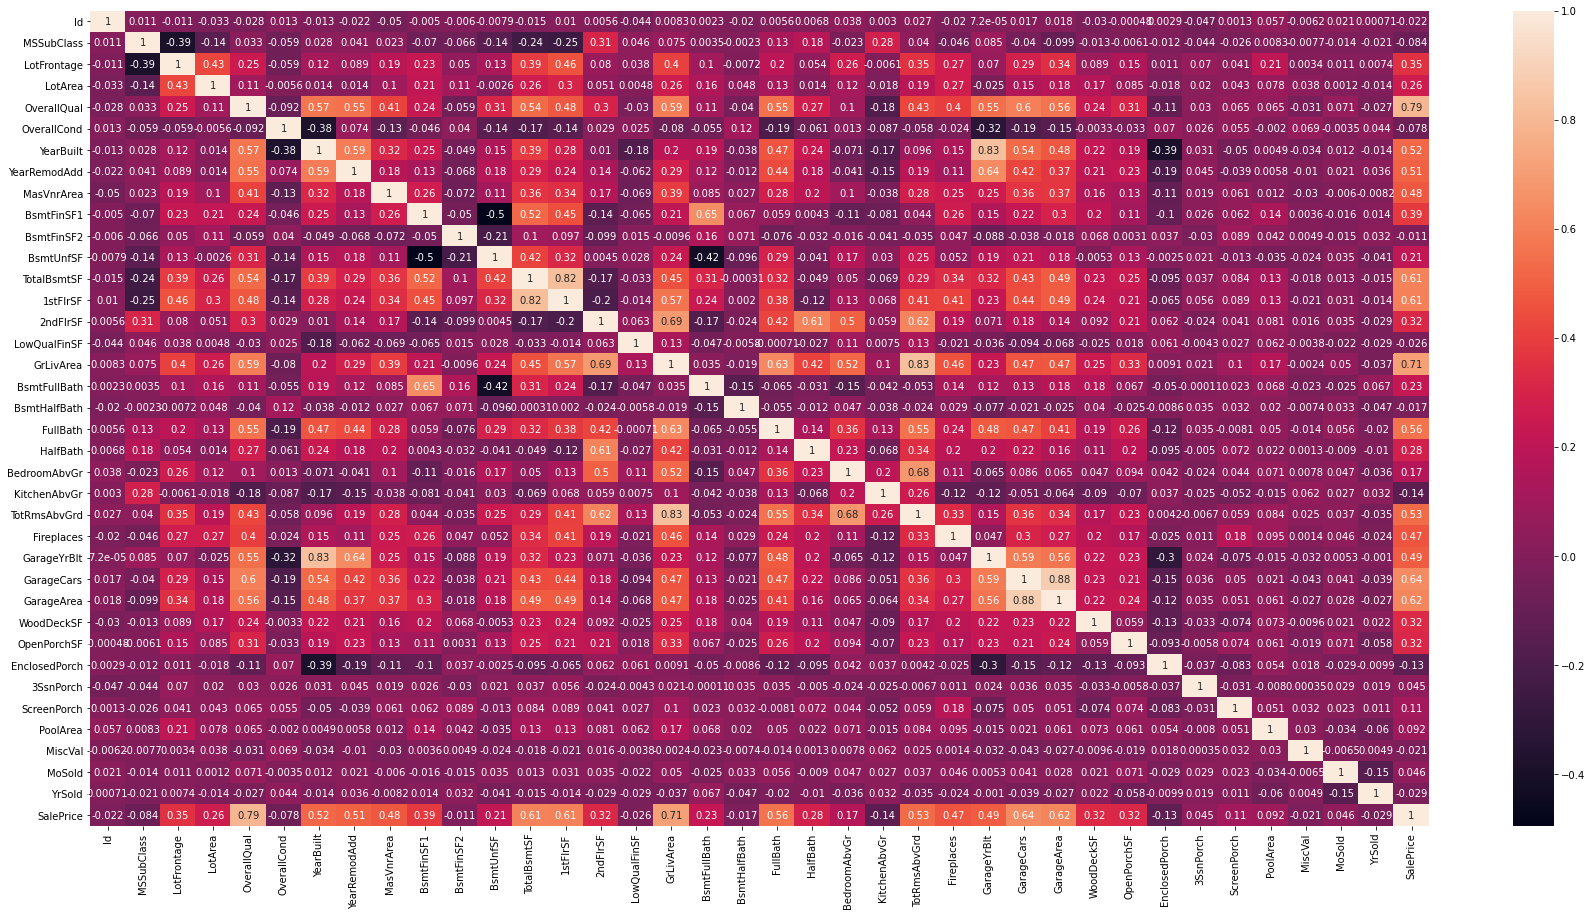

In [7]:
plt.figure(figsize=[30,15])
sns.heatmap(train_df.corr(), annot=True)

In [8]:
train_df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [9]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B63F9A7F0>,
      dtype=object)

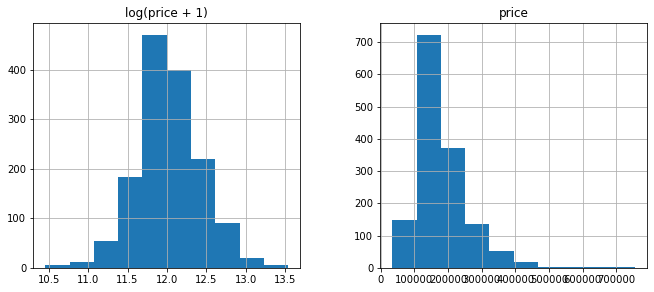

In [10]:
#matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
#matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist(figsize=(11,4.5))

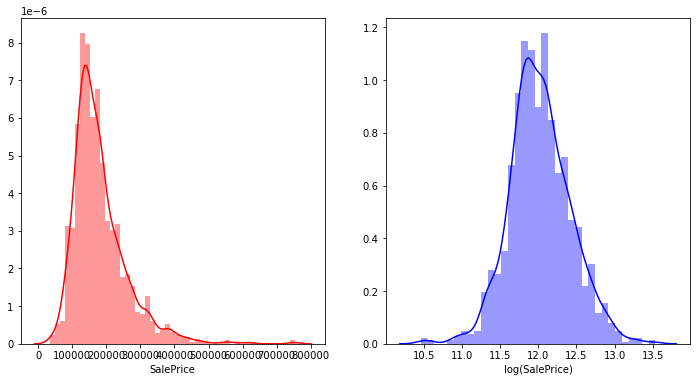

In [11]:
plt.subplots(figsize=(12,6))
subplot(1,2,1)
ax = sns.distplot(train_df['SalePrice'],axlabel='SalePrice',label='SalePrice',color='r')

subplot(1,2,2)
ax = sns.distplot(np.log1p(train_df['SalePrice']),axlabel='log(SalePrice)',label='log(SalePrice)',color='b')

#subplot(2,2,3)
#ax = sns.distplot(x, vertical=True)

#subplot(2,2,4)
#ax = sns.kdeplot(x, shade=True, color="r")

plt.show()

In [12]:
train_df["SalePrice"]=np.log1p(train_df["SalePrice"])

In [13]:
numeric = houses.dtypes[houses.dtypes != "object"].index

In [14]:
numeric=list(numeric)
numeric.pop(0)
numeric.pop(1)
numeric.pop(-1)
numeric

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
houses[numeric].isnull().sum()[houses[numeric].isnull().sum()>0]

MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [16]:
numeric=houses[numeric].isnull().sum()[houses[numeric].isnull().sum()>0].index

In [17]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.max()))
test_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.max()))
train_df[numeric]=train_df[numeric].fillna(0)
test_df[numeric]=test_df[numeric].fillna(0)
houses= pd.concat([train_df,test_df],keys=['train','test'])

In [18]:
houses[numeric].isnull().sum()[houses[numeric].isnull().sum()>0]

Series([], dtype: int64)

In [19]:
colors = itertools.cycle(["r","b","g","y","r", "b","g","y","r", "b","g","y","r", "b","g",
                          
                          "y","r", "b","g","y","r", "b","g","y"])

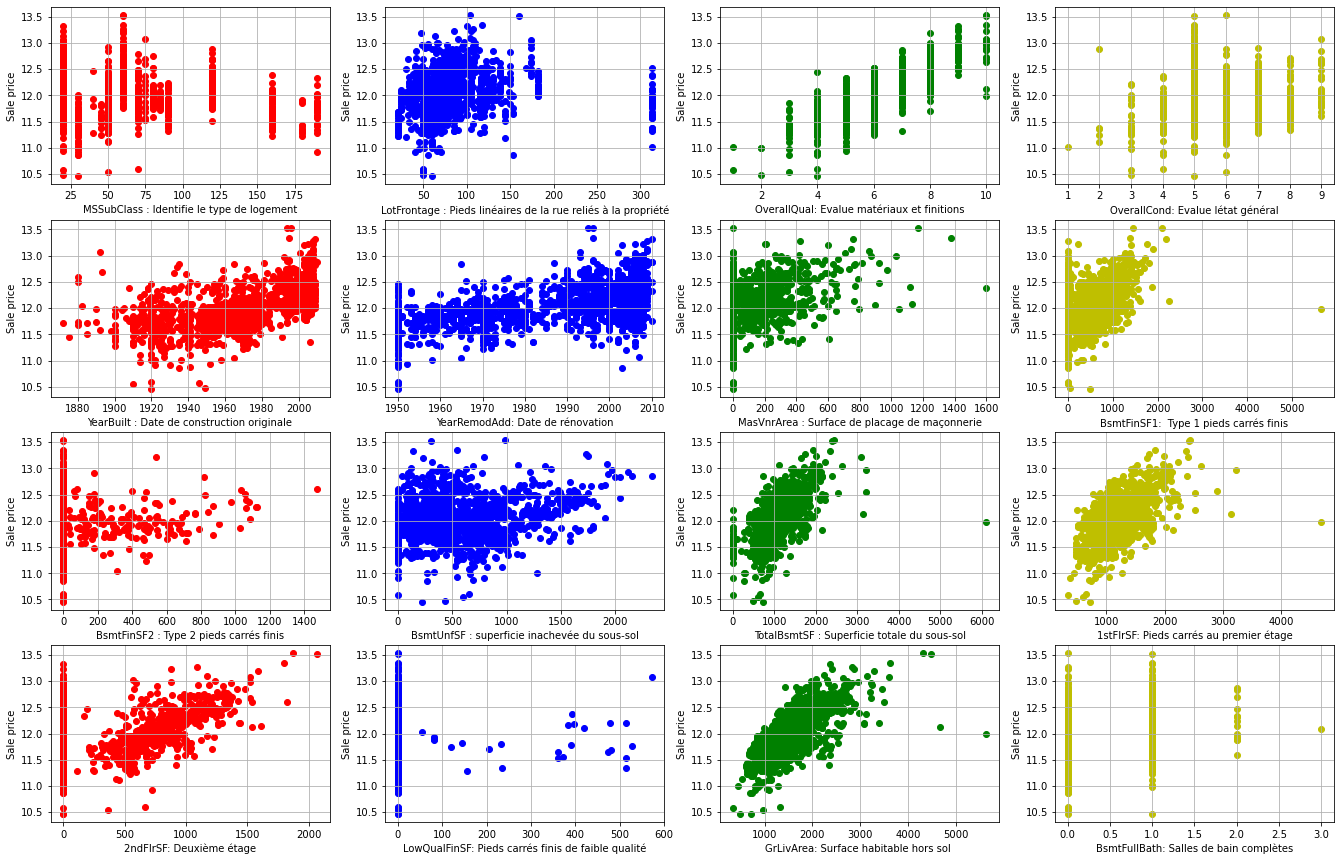

In [20]:
#plt.style.use('dark_background')
#fig, axes = plt.subplots(nrows= 5,ncols = 4, figsize=(23,15))
fig, axes = plt.subplots(nrows= 4,ncols = 4, figsize=(23,15))
###################################################################################################
axes[0,0].scatter(train_df['MSSubClass'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[0,1].scatter(train_df['LotFrontage'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[0,2].scatter(train_df['OverallQual'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[0,3].scatter(train_df['OverallCond'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[1,0].scatter(train_df['YearBuilt'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[1,1].scatter(train_df['YearRemodAdd'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[1,2].scatter(train_df['MasVnrArea'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[1,3].scatter(train_df['BsmtFinSF1'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[2,0].scatter(train_df['BsmtFinSF2'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[2,1].scatter(train_df['BsmtUnfSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[2,2].scatter(train_df['TotalBsmtSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[2,3].scatter(train_df['1stFlrSF'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[3,0].scatter(train_df['2ndFlrSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[3,1].scatter(train_df['LowQualFinSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[3,2].scatter(train_df['GrLivArea'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[3,3].scatter(train_df['BsmtFullBath'], train_df['SalePrice'], marker = 'o', color=next(colors))

#axes[4,0].scatter(train_df['BsmtFinSF1SF2'], train_df['SalePrice'], marker = 'o', color=next(colors))
#axes[4,1].scatter(train_df['BsmtUnTotalfSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
#axes[4,2].scatter(train_df['1st2ndFlrSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
###################################################################################################
axes[0,0].grid(True)
axes[0,1].grid(True)
axes[0,2].grid(True)
axes[0,3].grid(True)

axes[1,0].grid(True)
axes[1,1].grid(True)
axes[1,2].grid(True)
axes[1,3].grid(True)

axes[2,0].grid(True)
axes[2,1].grid(True)
axes[2,2].grid(True)
axes[2,3].grid(True)

axes[3,0].grid(True)
axes[3,1].grid(True)
axes[3,2].grid(True)
axes[3,3].grid(True)

#axes[4,0].grid(True)
#axes[4,1].grid(True)
#axes[4,2].grid(True)
###################################################################################################
axes[0,0].set_title('')
axes[0,1].set_title('')
axes[0,2].set_title('')
axes[0,3].set_title('')

axes[1,0].set_title('')
axes[1,1].set_title('')
axes[1,2].set_title('')
axes[1,3].set_title('')

axes[2,0].set_title('')
axes[2,1].set_title('')
axes[2,2].set_title('')
axes[2,3].set_title('')

axes[3,0].set_title('')
axes[3,1].set_title('')
axes[3,2].set_title('')
axes[3,3].set_title('')

#axes[4,0].set_title('')
#axes[4,1].set_title('')
#axes[4,2].set_title('')
###################################################################################################
axes[0,0].set_xlabel('MSSubClass : Identifie le type de logement')
axes[0,0].set_ylabel('Sale price');
axes[0,1].set_xlabel('LotFrontage : Pieds linéaires de la rue reliés à la propriété')
axes[0,1].set_ylabel('Sale price');
axes[0,2].set_xlabel('OverallQual: Evalue matériaux et finitions')
axes[0,2].set_ylabel('Sale price');
axes[0,3].set_xlabel('OverallCond: Evalue létat général')
axes[0,3].set_ylabel('Sale price');

axes[1,0].set_xlabel('YearBuilt : Date de construction originale')
axes[1,0].set_ylabel('Sale price');
axes[1,1].set_xlabel('YearRemodAdd: Date de rénovation')
axes[1,1].set_ylabel('Sale price');
axes[1,2].set_xlabel('MasVnrArea : Surface de placage de maçonnerie')
axes[1,2].set_ylabel('Sale price');
axes[1,3].set_xlabel('BsmtFinSF1:  Type 1 pieds carrés finis')
axes[1,3].set_ylabel('Sale price');

axes[2,0].set_xlabel('BsmtFinSF2 : Type 2 pieds carrés finis')
axes[2,0].set_ylabel('Sale price');
axes[2,1].set_xlabel('BsmtUnfSF : superficie inachevée du sous-sol')
axes[2,1].set_ylabel('Sale price');
axes[2,2].set_xlabel('TotalBsmtSF : Superficie totale du sous-sol')
axes[2,2].set_ylabel('Sale price');
axes[2,3].set_xlabel('1stFlrSF: Pieds carrés au premier étage')
axes[2,3].set_ylabel('Sale price');

axes[3,0].set_xlabel('2ndFlrSF: Deuxième étage')
axes[3,0].set_ylabel('Sale price');
axes[3,1].set_xlabel('LowQualFinSF: Pieds carrés finis de faible qualité')
axes[3,1].set_ylabel('Sale price');
axes[3,2].set_xlabel('GrLivArea: Surface habitable hors sol ')
axes[3,2].set_ylabel('Sale price');
axes[3,3].set_xlabel('BsmtFullBath: Salles de bain complètes')
axes[3,3].set_ylabel('Sale price');

#axes[4,0].set_xlabel('BsmtFinSF1+BsmtFinSF2')
#axes[4,0].set_ylabel('Sale price');
#axes[4,1].set_xlabel('BsmtUnfSF+TotalBsmtSF')
#axes[4,1].set_ylabel('Sale price');
#axes[4,2].set_xlabel('1stFlrSF+2ndFlrSF')
#axes[4,2].set_ylabel('Sale price');

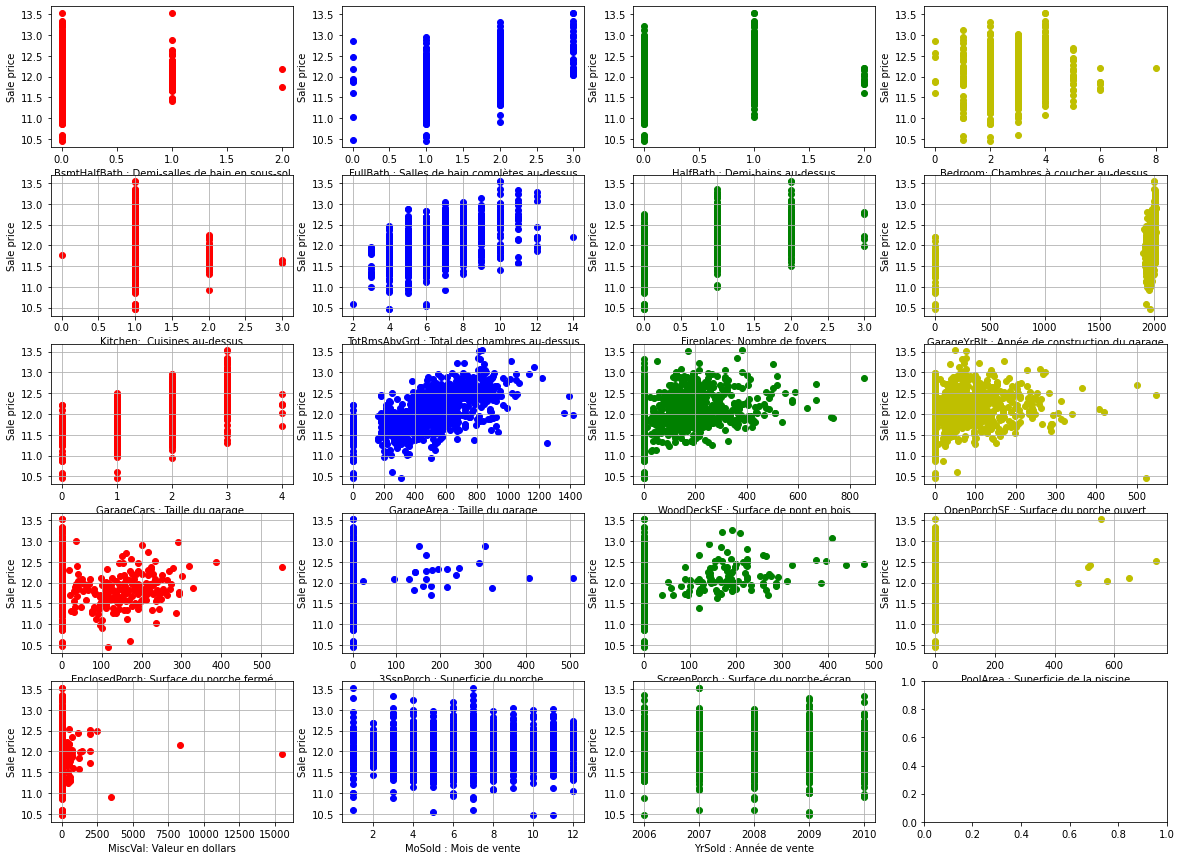

In [21]:
colors = itertools.cycle(["r","b","g","y","r", "b","g","y","r", "b","g","y","r", "b","g",
                          
                          "y","r", "b","g","y","r", "b","g","y"])
#plt.style.use('dark_background')
fig, axes = plt.subplots(nrows= 5,ncols = 4, figsize=(20,15))
###################################################################################################
axes[0,0].scatter(train_df['BsmtHalfBath'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[0,1].scatter(train_df['FullBath'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[0,2].scatter(train_df['HalfBath'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[0,3].scatter(train_df['BedroomAbvGr'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[1,0].scatter(train_df['KitchenAbvGr'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[1,1].scatter(train_df['TotRmsAbvGrd'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[1,2].scatter(train_df['Fireplaces'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[1,3].scatter(train_df['GarageYrBlt'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[2,0].scatter(train_df['GarageCars'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[2,1].scatter(train_df['GarageArea'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[2,2].scatter(train_df['WoodDeckSF'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[2,3].scatter(train_df['OpenPorchSF'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[3,0].scatter(train_df['EnclosedPorch'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[3,1].scatter(train_df['3SsnPorch'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[3,2].scatter(train_df['ScreenPorch'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[3,3].scatter(train_df['PoolArea'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[4,0].scatter(train_df['MiscVal'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[4,1].scatter(train_df['MoSold'], train_df['SalePrice'], marker = 'o', color=next(colors))
axes[4,2].scatter(train_df['YrSold'], train_df['SalePrice'], marker = 'o', color=next(colors))

axes[1,0].grid(True)
axes[1,1].grid(True)
axes[1,2].grid(True)
axes[1,3].grid(True)

axes[2,0].grid(True)
axes[2,1].grid(True)
axes[2,2].grid(True)
axes[2,3].grid(True)

axes[3,0].grid(True)
axes[3,1].grid(True)
axes[3,2].grid(True)
axes[3,3].grid(True)

axes[4,0].grid(True)
axes[4,1].grid(True)
axes[4,2].grid(True)
###################################################################################################
axes[0,0].set_title('')
axes[0,1].set_title('')
axes[0,2].set_title('')
axes[0,3].set_title('')

axes[1,0].set_title('')
axes[1,1].set_title('')
axes[1,2].set_title('')
axes[1,3].set_title('')

axes[2,0].set_title('')
axes[2,1].set_title('')
axes[2,2].set_title('')
axes[2,3].set_title('')

axes[3,0].set_title('')
axes[3,1].set_title('')
axes[3,2].set_title('')
axes[3,3].set_title('')

axes[4,0].set_title('')
axes[4,1].set_title('')
axes[4,2].set_title('')
###################################################################################################
axes[0,0].set_xlabel('BsmtHalfBath : Demi-salles de bain en sous-sol')
axes[0,0].set_ylabel('Sale price');
axes[0,1].set_xlabel('FullBath : Salles de bain complètes au-dessus')
axes[0,1].set_ylabel('Sale price');
axes[0,2].set_xlabel('HalfBath : Demi-bains au-dessus')
axes[0,2].set_ylabel('Sale price');
axes[0,3].set_xlabel('Bedroom: Chambres à coucher au-dessus ')
axes[0,3].set_ylabel('Sale price');

axes[1,0].set_xlabel('Kitchen:  Cuisines au-dessus')
axes[1,0].set_ylabel('Sale price');
axes[1,1].set_xlabel('TotRmsAbvGrd : Total des chambres au-dessus')
axes[1,1].set_ylabel('Sale price');
axes[1,2].set_xlabel('Fireplaces: Nombre de foyers')
axes[1,2].set_ylabel('Sale price');
axes[1,3].set_xlabel('GarageYrBlt : Année de construction du garage')
axes[1,3].set_ylabel('Sale price');

axes[2,0].set_xlabel('GarageCars : Taille du garage ')
axes[2,0].set_ylabel('Sale price');
axes[2,1].set_xlabel('GarageArea : Taille du garage')
axes[2,1].set_ylabel('Sale price');
axes[2,2].set_xlabel('WoodDeckSF : Surface de pont en bois')
axes[2,2].set_ylabel('Sale price');
axes[2,3].set_xlabel('OpenPorchSF : Surface du porche ouvert')
axes[2,3].set_ylabel('Sale price');

axes[3,0].set_xlabel('EnclosedPorch: Surface du porche fermé')
axes[3,0].set_ylabel('Sale price');
axes[3,1].set_xlabel('3SsnPorch : Superficie du porche ')
axes[3,1].set_ylabel('Sale price');
axes[3,2].set_xlabel('ScreenPorch : Surface du porche-écran')
axes[3,2].set_ylabel('Sale price');
axes[3,3].set_xlabel('PoolArea : Superficie de la piscine')
axes[3,3].set_ylabel('Sale price');

axes[4,0].set_xlabel('MiscVal: Valeur en dollars')
axes[4,0].set_ylabel('Sale price');
axes[4,1].set_xlabel('MoSold : Mois de vente')
axes[4,1].set_ylabel('Sale price');
axes[4,2].set_xlabel('YrSold : Année de vente')
axes[4,2].set_ylabel('Sale price');

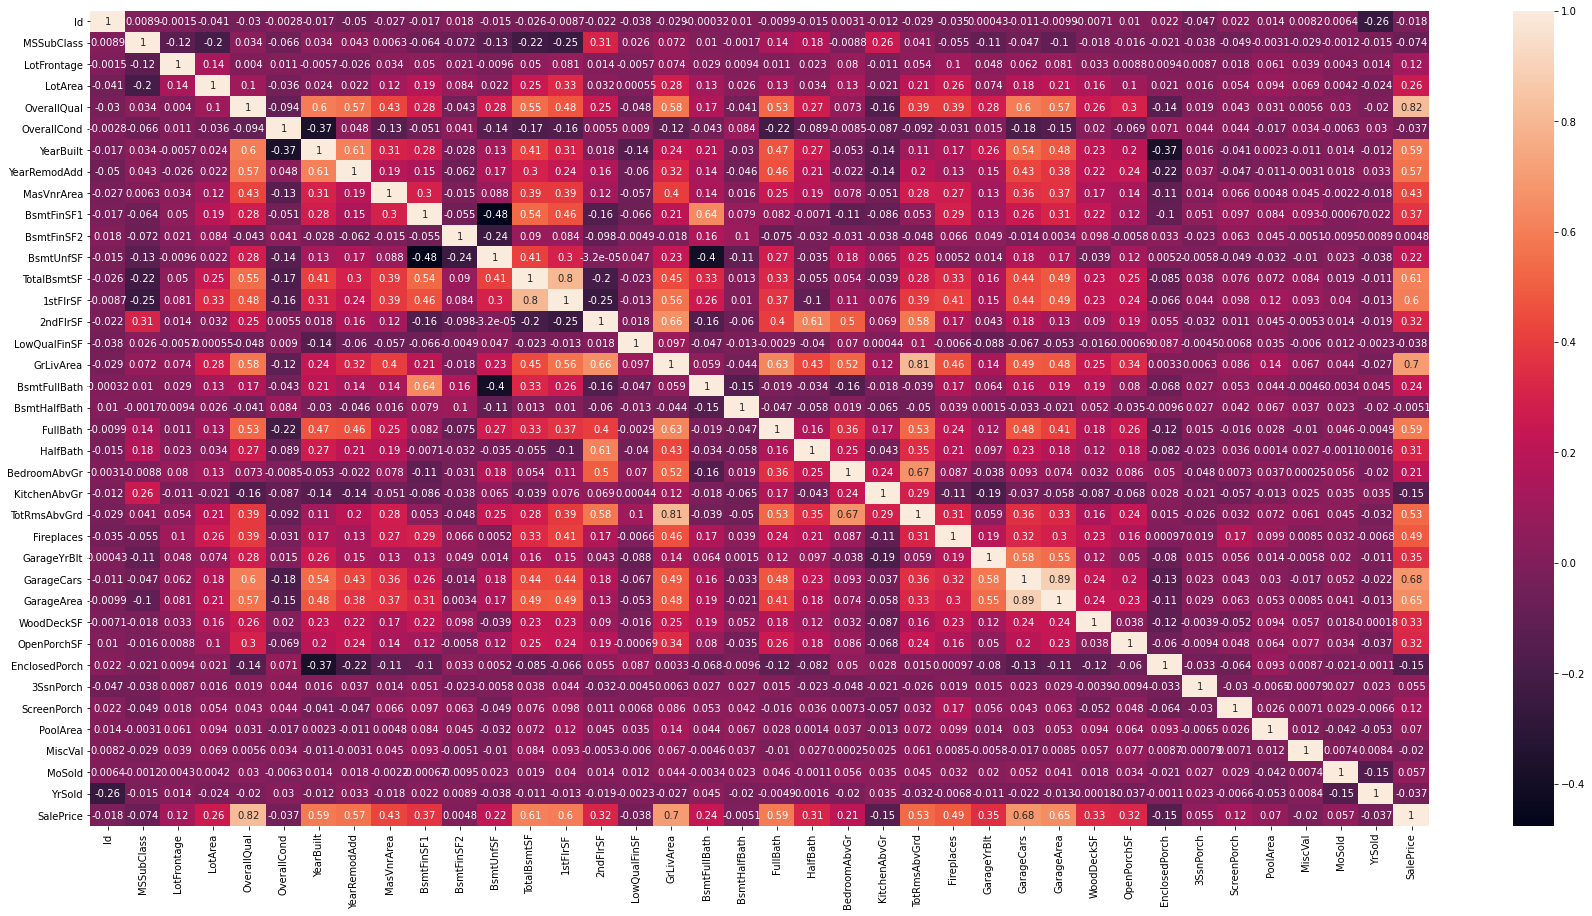

In [22]:
plt.figure(figsize=[30,15])
sns.heatmap(houses.corr(), annot=True)

In [23]:
qualit = houses.dtypes[houses.dtypes == "object"].index

In [24]:
qualit=houses[qualit].isnull().sum()[houses[qualit].isnull().sum()>0].index

In [25]:
ordinal=['BsmtQual','BsmtCond','KitchenQual','GarageQual','GarageCond','FireplaceQu',
         'PoolQC','GarageFinish','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [26]:
for i in ordinal:
    train_df[i].fillna('NA',inplace=True)
    test_df[i].fillna('NA',inplace=True)

In [27]:
for i in ordinal:
    print(i,'  ',train_df[i].unique())

BsmtQual    ['Gd' 'TA' 'Ex' 'NA' 'Fa']
BsmtCond    ['TA' 'Gd' 'NA' 'Fa' 'Po']
KitchenQual    ['Gd' 'TA' 'Ex' 'Fa']
GarageQual    ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
GarageCond    ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
FireplaceQu    ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC    ['NA' 'Ex' 'Fa' 'Gd']
GarageFinish    ['RFn' 'Unf' 'Fin' 'NA']
BsmtExposure    ['No' 'Gd' 'Mn' 'Av' 'NA']
BsmtFinType1    ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2    ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [28]:
#Training

order=['NA','Po','Fa','TA','Gd','Ex']
#BsmtBsmtQual   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#BsmtCond   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#KitchenQual   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#GarageQual   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#GarageCond   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#FireplaceQu   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})

order=['NA','Fa','Gd','Ex']
#PoolQC  ['NA','Fa','Gd','Ex']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3})

order=['NA','Unf','RFn','Fin']
#GarageFinish    ['NA','Unf','RFn','Fin']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3})

order=['NA','No','Mn','Av','Gd']
#BsmtExposure  ['NA','No','Mn','Av','Gd']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4})

order=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
#BsmtFinType1    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5,order[6]:6})
#BsmtFinType2    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
col=ordinal.pop(0)
train_df[col]=train_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5,order[6]:6})

In [29]:
ordinal=['BsmtQual','BsmtCond','KitchenQual','GarageQual','GarageCond','FireplaceQu',
         'PoolQC','GarageFinish','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [30]:
#Testing

order=['NA','Po','Fa','TA','Gd','Ex']
#BsmtBsmtQual   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#BsmtCond   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#KitchenQual   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#GarageQual   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#GarageCond   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})
#FireplaceQu   ['NA','Po','Fa','TA','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5})

order=['NA','Fa','Gd','Ex']
#PoolQC  ['NA','Fa','Gd','Ex']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3})

order=['NA','Unf','RFn','Fin']
#GarageFinish    ['NA','Unf','RFn','Fin']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3})

order=['NA','No','Mn','Av','Gd']
#BsmtExposure  ['NA','No','Mn','Av','Gd']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4})

order=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
#BsmtFinType1    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5,order[6]:6})
#BsmtFinType2    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
col=ordinal.pop(0)
test_df[col]=test_df[col].map({order[0]:0,order[1]:1,order[2]:2,order[3]:3,order[4]:4,order[5]:5,order[6]:6})

In [31]:
#houses=[training,testing]
houses= pd.concat([train_df,test_df],keys=['train','test'])

In [32]:
#BsmtQual   ['NA','Po','Fa','TA','Gd','Ex']
#BsmtCond   ['NA','Po','Fa','TA','Gd','Ex']
#KitchenQual   ['NA','Po','Fa','TA','Gd','Ex']
#GarageQual   ['NA','Po','Fa','TA','Gd','Ex']    
#GarageCond   ['NA','Po','Fa','TA','Gd','Ex']
#FireplaceQu   ['NA','Po','Fa','TA','Gd','Ex']
#PoolQC  ['NA','Fa','Gd','Ex']
#GarageFinish    ['NA','Unf','RFn','Fin']
#BsmtExposure  ['NA','No','Mn','Av','Gd']
#BsmtFinType1    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
#BsmtFinType2    ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']

In [33]:
qualit=houses[qualit].isnull().sum()[houses[qualit].isnull().sum()>0].index

In [34]:
qualit

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Electrical', 'Functional', 'GarageType', 'Fence',
       'MiscFeature', 'SaleType'],
      dtype='object')

In [35]:
for i in qualit:
    print(i,':  train: ',round(train_df[i].isnull().sum()/len(train_df)*100,0),'    test: ',
    round(test_df[i].isnull().sum()/len(test_df)*100,0),'  values.size: ',train_df[i].unique().size)

MSZoning :  train:  0.0     test:  0.0   values.size:  5
Alley :  train:  94.0     test:  93.0   values.size:  3
Utilities :  train:  0.0     test:  0.0   values.size:  2
Exterior1st :  train:  0.0     test:  0.0   values.size:  15
Exterior2nd :  train:  0.0     test:  0.0   values.size:  16
MasVnrType :  train:  1.0     test:  1.0   values.size:  5
Electrical :  train:  0.0     test:  0.0   values.size:  6
Functional :  train:  0.0     test:  0.0   values.size:  7
GarageType :  train:  6.0     test:  5.0   values.size:  7
Fence :  train:  81.0     test:  80.0   values.size:  5
MiscFeature :  train:  96.0     test:  97.0   values.size:  5
SaleType :  train:  0.0     test:  0.0   values.size:  9


In [36]:
nominal_mode=[i for i in qualit if round(train_df[i].isnull().sum()/len(train_df),2)<0.1]
nominal_nw_var=[i for i in qualit if round(train_df[i].isnull().sum()/len(train_df),2)>0.1]

In [37]:
print(nominal_mode)
print(nominal_nw_var)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'Functional', 'GarageType', 'SaleType']
['Alley', 'Fence', 'MiscFeature']


In [38]:
for i in nominal_mode:
    train_df[i].fillna(train_df[i].mode()[0],inplace=True)
    test_df[i].fillna(train_df[i].mode()[0],inplace=True)

In [39]:
for i in nominal_nw_var:
    train_df[i].fillna('NA',inplace=True)
    test_df[i].fillna('NA',inplace=True)

In [40]:
#houses=[training,testing]
houses= pd.concat([train_df,test_df],keys=['train','test'])

In [41]:
qualit=houses.dtypes[houses.dtypes=='object'].index
qualit

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [42]:
# Getting Dummies from all other categorical vars
for col in qualit:
    for_dummy = houses.pop(col)
    houses = pd.concat([houses, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [43]:
houses.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)

In [44]:
qualit=houses.dtypes[houses.dtypes == "object"].index
qualit

Index([], dtype='object')

In [45]:
for i in qualit:
    lb=LabelEncoder().fit(list(train_df[i].unique()))
    train_df[i]=lb.transform(train_df[i])
    test_df[i]=lb.transform(test_df[i])

In [46]:
houses.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)

In [47]:
train_df=houses[:len(train_df)]
test_df=houses[len(train_df):]

In [48]:
houses.head(1)

,,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
train,0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0


In [49]:
cols=list(houses.columns)
cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NA',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandCo

In [50]:
cols.pop(0)
cols.pop(47)
#cols.pop('SalePrice')

'SalePrice'

In [51]:
k=0
for i in cols:
    print(k,' ',i)
    k=k+1

0   MSSubClass
1   LotFrontage
2   LotArea
3   OverallQual
4   OverallCond
5   YearBuilt
6   YearRemodAdd
7   MasVnrArea
8   BsmtQual
9   BsmtCond
10   BsmtExposure
11   BsmtFinType1
12   BsmtFinSF1
13   BsmtFinType2
14   BsmtFinSF2
15   BsmtUnfSF
16   TotalBsmtSF
17   1stFlrSF
18   2ndFlrSF
19   LowQualFinSF
20   GrLivArea
21   BsmtFullBath
22   BsmtHalfBath
23   FullBath
24   HalfBath
25   BedroomAbvGr
26   KitchenAbvGr
27   KitchenQual
28   TotRmsAbvGrd
29   Fireplaces
30   FireplaceQu
31   GarageYrBlt
32   GarageFinish
33   GarageCars
34   GarageArea
35   GarageQual
36   GarageCond
37   WoodDeckSF
38   OpenPorchSF
39   EnclosedPorch
40   3SsnPorch
41   ScreenPorch
42   PoolArea
43   PoolQC
44   MiscVal
45   MoSold
46   YrSold
47   MSZoning_C (all)
48   MSZoning_FV
49   MSZoning_RH
50   MSZoning_RL
51   MSZoning_RM
52   Street_Grvl
53   Street_Pave
54   Alley_Grvl
55   Alley_NA
56   Alley_Pave
57   LotShape_IR1
58   LotShape_IR2
59   LotShape_IR3
60   LotShape_Reg
61   LandContour_B

In [52]:
houses

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
train 0        1          60         65.0     8450            7            5   
      1        2          20         80.0     9600            6            8   
      2        3          60         68.0    11250            7            5   
      3        4          70         60.0     9550            7            5   
      4        5          60         84.0    14260            8            5   
...          ...         ...          ...      ...          ...          ...   
test  1454  2915         160         62.0     1936            4            7   
      1455  2916         160         62.0     1894            4            5   
      1456  2917          20         85.0    20000            5            7   
      1457  2918          85         66.0    10441            5            5   
      1458  2919          60         68.0     9627            7            5   

            YearBuilt  YearRemodAdd  MasVnrArea  BsmtQual  ...  \
train 0          2003          2003       196.0         4  ...   
      1          1976          1976         0.0         4  ...   
      2          2001          2002       162.0         4  ...   
      3          1915          1970         0.0         3  ...   
      4          2000          2000       350.0         4  ...   
...               ...           ...         ...       ...  ...   
test  1454       1970          1970         0.0         3  ...   
      1455       1970          1970         0.0         3  ...   
      1456       1960          1996         0.0         3  ...   
      1457       1992          1992         0.0         4  ...   
      1458       1993          1994        94.0         4  ...   

            SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
train 0                  0             0             0            1   
      1                  0             0             0            1   
      2                  0             0             0            1   
      3                  0             0             0            1   
      4                  0             0             0            1   
...                    ...           ...           ...          ...   
test  1454               0             0             0            1   
      1455               0             0             0            1   
      1456               0             0             0            1   
      1457               0             0             0            1   
      1458               0             0             0            1   

            SaleCondition_Abnorml  SaleCondition_AdjLand  \
train 0                         0                      0   
      1                         0                      0   
      2                         0                      0   
      3                         1                      0   
      4                         0                      0   
...                           ...                    ...   
test  1454                      0                      0   
      1455                      1                      0   
      1456                      1                      0   
      1457                      0                      0   
      1458                      0                      0   

            SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
train 0                        0                     0                     1   
      1                        0                     0                     1   
      2                        0                     0                     1   
      3                        0                     0                     0   
      4                        0                     0                     1   
...                          ...                   ...                   ...   
test  1454                     0                     0                     1   
      1455                     0              

In [53]:
houses.dtypes[houses.dtypes=='object']

Series([], dtype: object)

In [54]:
c=houses.dtypes.index
for i in c:
    print(i)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Fireplaces
FireplaceQu
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_NA
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSi

In [55]:
x=houses.drop(['Id','SalePrice'],axis=1)

In [56]:
y=train_df['SalePrice']
X=x[:len(train_df)]
X_sub=x[len(train_df):]

In [57]:
scaler=StandardScaler()
scaler.fit(houses[cols])
X=scaler.transform(X)
X_sub=scaler.transform(X_sub)

In [58]:
cols=houses.dtypes.index
cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)

In [59]:
X_sub

array([[-0.87361603, -0.41078857,  0.1843712 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [-0.87361603, -0.12539018,  0.51979081, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.06733141, -0.35370889,  0.46437366, ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [-0.87361603, -0.03025738,  1.24680804, ..., -0.12653513,
        -2.15546626, -0.30269297],
       [ 0.65542357, -0.39176201,  0.0346054 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.06733141, -0.35370889, -0.06862014, ..., -0.12653513,
         0.46393674, -0.30269297]])

In [60]:
test_df['Id']

test  0       1461
      1       1462
      2       1463
      3       1464
      4       1465
              ... 
      1454    2915
      1455    2916
      1456    2917
      1457    2918
      1458    2919
Name: Id, Length: 1459, dtype: int64

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [62]:
#Algo  GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =21)
model.fit(X_train, y_train)
#Prediction
y_pred = model.predict(X_test)
#SaleP = model.predict(X_sub)
y_train_preds = model.predict(X_train)

In [63]:
error=np.sqrt(mean_squared_error(y_test,y_pred))
error1=np.sqrt(mean_squared_error(y_train,y_train_preds))
print('Test: ',error,'    Train: ',error1)

Test:  0.12814003241370733     Train:  0.058153975106849144


In [64]:
SaleP = model.predict(X_sub)
SaleP = np.expm1(SaleP)

In [65]:
submission=pd.DataFrame({'Id':test_df["Id"],"SalePrice":SaleP})
submission.to_csv("HouseSalePrice.csv",index=False)